In [1]:
%pip install --upgrade neurokit2
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\WorkSpace\Practice\env2\Lib\site-packages\neurokit2\eda\eda_clean.py:69: NeuroKitWarning: There are 2 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
c:\WorkSpace\Practice\env2\Lib\site-packages\neurokit2\eda\eda_clean.py:94: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  eda_signal = pd.DataFrame.pad(pd.Series(eda_signal))
c:\WorkSpace\Practice\env2\Lib\site-packages\neurokit2\eda\eda_plot.py:50: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


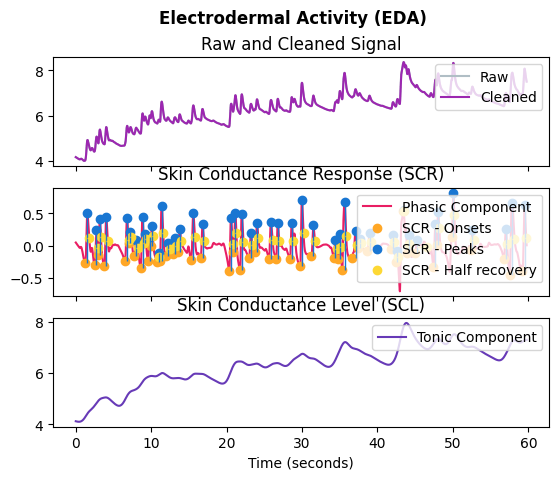

Number of SCR peaks: 59778
Mean SCR amplitude: 0.00038280648793114023
Max SCR amplitude: 1.1188654498201154

Time-domain analysis:
   SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  EDA_Sympathetic  \
0         46.0                  0.497465      0.804685              NaN   

   EDA_SympatheticN  EDA_Autocorrelation  
0               NaN             0.565417  


In [3]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('C:\WorkSpace\Practice\皮膚コンダクタンス\kiuchi_test_2_01[].csv')

# Extract the skin conductance data
sc_data = df['Sensor-E:SC/GSR'].values

# Set the sampling rate
sampling_rate = 128

# Process the skin conductance signal
sc_signals, info = nk.eda_process(sc_data, sampling_rate=sampling_rate)

# Plot the results
try:
    nk.eda_plot(sc_signals, sampling_rate=sampling_rate)
except TypeError:
    # If the above fails, try without sampling_rate
    nk.eda_plot(sc_signals)
plt.show()

# Analyze SCR (Skin Conductance Response) peaks
scr_peaks, info = nk.eda_peaks(sc_signals['EDA_Clean'].values, sampling_rate=sampling_rate)

# Print some basic statistics
print("Number of SCR peaks:", len(scr_peaks))
if 'SCR_Amplitude' in sc_signals.columns:
    print("Mean SCR amplitude:", sc_signals['SCR_Amplitude'].mean())
    print("Max SCR amplitude:", sc_signals['SCR_Amplitude'].max())
else:
    print("SCR_Amplitude not found in processed signals.")

# Perform time-domain analysis
eda_time = nk.eda_intervalrelated(sc_signals)
print("\nTime-domain analysis:")
print(eda_time)

# Optionally, you can save the processed data
sc_signals.to_csv('processed_sc_data.csv', index=False)